# Ch 02 - Statistical Learning - Conceptual Exercises

### Index
1. [Flexible model - better or worse](#Flexible-model---better-or-worse)
2. [Identify - Classification or Regression](#Identify---Classification-or-Regression)
3. [Bias-Variance decomposition](#Bias-Variance-decomposition)
4. [Real-life applications of statistical learning](#Real-life-applications-of-statistical-learning)
5. [Pro and cons of flexible / less flexible approaches](#Pro-and-cons-of-flexible-/-less-flexible-approaches)
6. [Parametric v Non-parametric](#Parametric-v-Non-parametric)
7. [KNN](#KNN)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### Flexible model - better or worse

**1. For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.**  
(a) The sample size n is extremely large, and the number of predictors p is small.  
(b) The number of predictors p is extremely large, and the number of observations n is small.  
(c) The relationship between the predictors and response is highly non-linear.  
(d) The variance of the error terms, i.e. σ2 = Var(ǫ), is extremely high

**Answer:**  
To judge the efficacy of a model, we need to measure how close the predictions are to the actual observations.  
In case of regression problems (problems with a quantitative response), most commonly-used measure is the Mean Squared Error method.  
We want to choose the method that gives the lowest test MSE, as opposed to the lowest training MSE.  
Eq 2.7 decomposes the expected test MSE into 3 fundamental quantities:
$$
E\left(y_{0}-\hat{f}\left(x_{0}\right)\right)^{2} = \operatorname{Var}\left(\hat{f}\left(x_{0}\right)\right) + \left[\operatorname{Bias}\left(\hat{f}\left(x_{0}\right)\right)\right]^{2} + \operatorname{Var}(\epsilon)
$$
- $E\left(y_{0}-\hat{f}\left(x_{0}\right)\right)^{2}$ &rarr; average test MSE that we would obtain if we repeatedly estimated f using a large no. of training sets, and tested each at $x_0$  
- $\operatorname{Var}\left(\hat{f}\left(x_{0}\right)\right)$ &rarr; variance, which refers to the amount by which $\hat{f}$ would change if estimated using a different training data set
- $\operatorname{Bias}\left(\hat{f}\left(x_{0}\right)\right)$ &rarr; error that arises due to the difference between $f$ and $\hat{f}$.  
Bias is introduced due to approximation of a real-life problem, which may be extremely complicated, by a much simpler model. 
- $\operatorname{Var}(\epsilon)$ &rarr; is the irreducible error.

In order to minimize the expected test error, we need to select a statistical learning method that simultaneously achieves low variance and low bias, such that together they add up to the lowest possible error.  
In general, fitting a more flexible model requires estimating a greater number of parameters. And generally, with an increase in flexibility of the chosen statistical learning technique, the bias goes down and the variance goes up. The relative rate of change of variance and bias is the determining factor in finding the optimum Bias-Variance trade-off point which has the lowest test MSE.

Fig 2.9 | Fig 2.10 | Fig 2.11
:---: | :---: | :---:
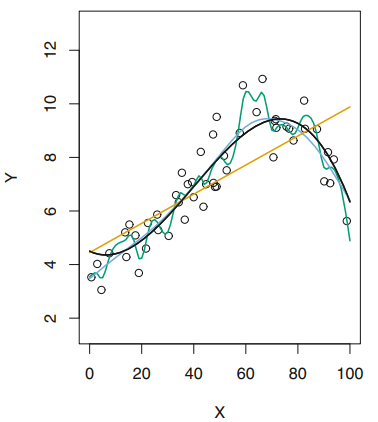 | 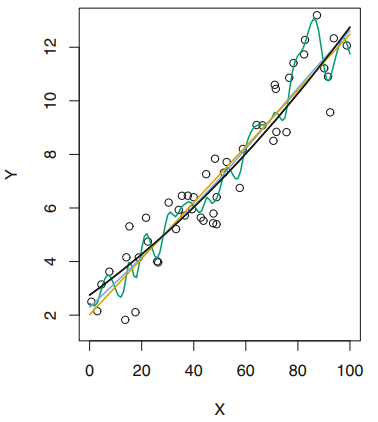 | 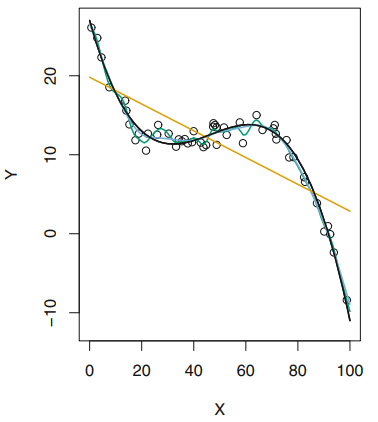

Black line represents the true (simulated) functional realtionship between x and y<br>
3 estimates of f $\Rightarrow$ Orange &rarr; linear regression line, two smoothing spline fits (blue and green curves)

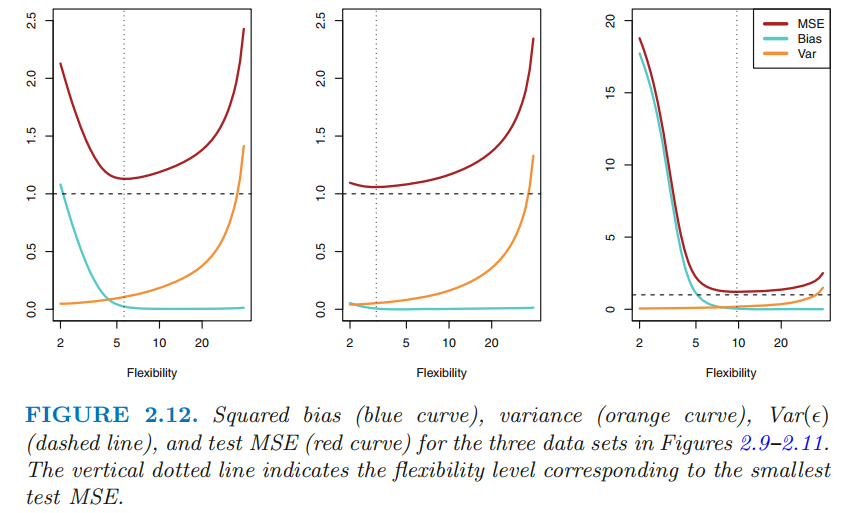




**(a) The sample size n is extremely large, and the number of predictors p is small.**  
In case of extremely large n & small p, a flexible statistical learning method would be **better**.

- A model trained on large n will be less sentitive to changes in the training dataset. This will keep the variance low.
- p adds to the degrees of freedom, which increases the complexity of a relationship. And the more complex a relationship is, the more flexibility you need in your estimated model to keep the bias down.
A lower p would leave room for using a more flexible technique, which will bring the bias down.

With an increase in flexibility, the variance will go up, but gradually (as n is large) and the bias will go down. 
So, with low variance to begin with, the optimum trade off point should come at a mid level of flexibility.

**(b) The number of predictors p is extremely large, and the number of observations n is small.**<br>
With extremely large p & small n, flexible method would **not be better**.<br>
A model trained on small n and high p, would have a high variance to begin with, which would rise rapidly with an increase in flexibility as the $\hat{f}$ would tend towards overfitting

**(c) The relationship between the predictors and response is highly non-linear.**  
A flexible method would be **better** in order to obtain an optimum $\hat{f}$<br> 
A highly non-linear $f$ would have a high degree of bias since a simpler model would be highly deficient in capturing the non-linearity in the relationship. Thus, the bias-varince trade-off point should come at a high flexibility level where bias is sufficiently low.

**(d) The variance of the error terms, i.e. Var($\epsilon$), is extremely high.**  
A flexible model would be **worse**.<br>
A flexible model would likely result in overfitting as it would tend to mould to the noise.

[Go to Index](#Index)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### Identify - Classification or Regression

**2. Explain whether each scenario is a classification or regression problem, and indicate whether we are most interested in inference or prediction. Finally, provide n and p.**  
(a) We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.  
(b) We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.  
(c) We are interest in predicting the % change in the USD/Euro exchange rate in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the USD/Euro, the % change in the US market, the % change in the British market, and the % change in the German market.

**Answer:**  
We tend to refer to problems with a quantitative response as regression problems, while those involving a qualitative response are often referred to as classification problems. 
However, the distinction is not always that crisp.  
Least squares linear regression is used with a quantitative response, whereas logistic regression is typically used with a qualitative (two-class, or binary) response. 
As such it is often used as a classification method. 
But since it estimates class probabilities, it can be thought of as a regression method as well.

**(a) We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.**  

Problem : **Regression**, as the response variable, CEO salary, is a quantitative continuous variable.  
Aim : **inference**, as we want to identify and understand the factors affecting CEO salary.  
n : 500  
p : 3

**(b) We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.**  

Problem : **Classification**, as the response variable, product success or faliure is qualitative.  
Aim : **prediction**, as we are primarily interested in knowing if the prduct launch will be a success or failure  
n : 20  
p : 13

**(c) We are interest in predicting the % change in the USD/Euro exchange rate in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the USD/Euro, the % change in the US market, the % change in the British market, and the % change in the German market.**  

Problem : **Regression**, response variable, % change in USD/Euro exchange rate, is quantiative  
Aim : **prediction**, of % change in USD/Euro exchange rate  
n : 52  
p : 3

[Go to Index](#Index)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### Bias-Variance decomposition

**3. We now revisit the bias-variance decomposition.**  
(a) Provide a sketch of typical (squared) bias, variance, training error, test error, and Bayes (or irreducible) error curves, on a single plot, as we go from less flexible statistical learning methods towards more flexible approaches. The x-axis should represent the amount of flexibility in the method, and the y-axis should represent the values for each curve. There should be five curves. Make sure to label each one.  
(b) Explain why each of the five curves has the shape displayed in part (a).

**Answer:**  
**(a) Sketch of bias, variance, training error, test error, and Bayes error curves**  
[Reference](https://botlnec.github.io/islp/sols/chapter2/exercise3/)

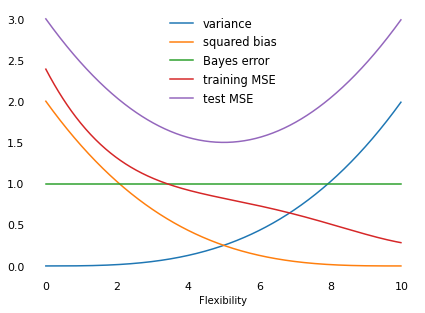

In [1]:
# Reference : https://botlnec.github.io/islp/sols/chapter2/exercise3/

import numpy as np
import matplotlib.pyplot as plt

def variance(x):
    return 0.002*x**3
def squared_bias(x):
    return 0.002*(-x+10)**3
def bayes_error(x):
    return x-x+1
def training_error(x):
    return 2.38936 - 0.825077*x + 0.176655*x**2 - 0.0182319*x**3 + 0.00067091*x**4
def test_error(x):
    return 3 - 0.6*x + .06*x**2


x = np.arange(0, 10, 0.02)

plt.figure(figsize=(7,5))
plt.plot(x, variance(x), label='variance')
plt.plot(x, squared_bias(x), label='squared bias')
plt.plot(x, bayes_error(x), label='Bayes error')
plt.plot(x, training_error(x), label='training MSE')
plt.plot(x, test_error(x), label='test MSE')

plt.legend(loc='upper center', frameon=False, prop={'size': 11.5})
plt.xlabel('Flexibility')
plt.box(False)
plt.tick_params(length=0, labelsize=11)
plt.show()

The chart above represents a problem with some degree of complexity.

**(b) Explain why each of the five curves has the shape displayed in part (a)**  
1. **Variance**  
Variance refers to the amount by which $\hat{f}$ would change if we estimated it using a different training data set.  
As flexibility is increased, the model moulds more closely to the given training data and as such, results in a larger change in $\hat{f}$ when training data set is changed. 
So, with an increase in flexibility, Variance also increases.


2. **Squared Bias**  
Bias refers to the error that is introduced by approximating a real-life problem, which may be extremely complicated, by a much simpler model.  
With an increase in flexibility, the model is able to incorporate some of the previously uncaptured relationships in the training data. Consequently, bias decreases with increment in flexibility.


3. **Bayes error**  
Bayes error refers to irreducible error, which by definition can't be predicted using $X$ and will not change with change in flexibility. Therefore, it is represented as a straight line.


4. **Training MSE**  
Increase in flexibility will result in the model moulding to the training data set more closely, so Training MSE decreases monotonically.


5. **Test MSE**  
Expected Test MSE = Variance + Squared Bias + Bayes Error.  
With an increase in flexibility, initially the model starts to fit to patterns that were not captured by the less flexible version but should have been accounted for, to bring $\hat{f}$ closer to true $f$. 
This brings the bias down by a higher degree than the increase in variance, which results in a decrease in Test MSE. 
Beyond a certain point, however, the more flexible versions will begin to fit to the noise in the training data set and result in overfitting. This will result in an increase in variance to a higher degree than the decline in bias, which would lead to an increase in Test MSE. 
Bayes Error is a constant line and does not affect Test MSE beyond defining a theoretical lower bound for test error.

[Go to Index](#Index)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### Real-life applications of statistical learning

**4. You will now think of some real-life applications for statistical learning.**  
(a) Describe three real-life applications in which classification might be useful. Describe the response, as well as the predictors. Is the goal of each application inference or prediction? Explain your answer.  
(b) Describe three real-life applications in which regression might be useful. Describe the response, as well as the predictors. Is the goal of each application inference or prediction? Explain your answer.  
(c) Describe three real-life applications in which cluster analysis might be useful

**(a) Describe three real-life applications in which classification might be useful. Describe the response, as well as the predictors. Is the goal of each application inference or prediction? Explain your answer.**

**Answer:**  
Real life <font color='red'>**classification**</font> scenarios:
1) **whether a loan applicant will default or not**  
Response &rarr; default on loan  
Predictors &rarr; income level, marital status, no of kids, existing debt obligations, age  
Goal &rarr; prediction  

2) **whether a streaming service (for eg Netflix) subsciber will watch the recommended movie or not**  
Response &rarr; movie viewed by subscriber - yes/no  
Predictors &rarr; language, genre, director, protaganist, supporting cast, rating, critic reviews, runtime  
Goal &rarr; prediction and inference (planning for future movie production)

3) **whether a patient has a disease or not**  
Response &rarr; ill / not ill  
Predictors &rarr; test results, age, symptoms present, history, family history, health indicators  
Goal &rarr; prediction  

4) **whether a subject supports a particular political candidate or not**  
Response &rarr; supports / does not support / undecided  
Predictors &rarr; political ideology, demographic variables, political orientation of family  
Goal &rarr; inference  

**(b) Describe three real-life applications in which regression might be useful. Describe the response, as well as the predictors. Is the goal of each application inference or prediction? Explain your answer.**  

**Answer:**  
Real life <span style="color:red;">**regression**</span> scenarios:
1) **projected sales of a product**  
Response &rarr; projected sales  
Predictors &rarr; demand, overall market supply, production qty, marketing expenditure, no. of competitors, marketing expenditure by competition, economic cycle, consumer price index, inflation of essentials, utility of the product   
Goal &rarr; prediction & inference  

2) **insurance claims cost**  
Response &rarr; amount of insurance claims  
Predictors &rarr; type of policy, insured amount, claim rate, past claims, policy duration  
Goal &rarr; prediction & inference  

3) **house prices**  
Response &rarr; estimated house price  
Predictors &rarr; area, no. of storeys, swimming pool, backyard, lawn, parking space, proximity to nearest school, police station, public transport station, park etc, neighbourhood crime rate  
Goal &rarr; prediction

4) **GDP growth rate**  
Response &rarr; GDP growth rate  
Predictors &rarr; economic cycle, national income, population, consumer price index, inflation rate,  avg central bank lending rate, population growth rate, industrial output, exp on education literacy rate etc.  
Goal &rarr; prediction & inference

**(c) Describe three real-life applications in which cluster analysis might be useful**  

**Answer:**  
Real life <span style="color:red;">**cluster analysis**</span> scenarios:
1) **outlier detection**  
Cluster analysis can help us identify data points that fall outside norms.

2) **marketing and/or product development strategies**  
Cluster analysis can be very useful for formulating marketing and/or product development strategies. It can be used in market research for delineating segments. For eg, identification of consumer segments, identifying target markets (georgraphically and/or demographically) etc. This can help in developing the right product or conceive a better targetted messaging strategy.

3) **email spam filter**  
Using email subject, source, content (choice, frequency of words etc.), emails can be clustered into groups whcih can then help identify spam.

4) **identifying fraudulent activity**  
By grouping data based on activity, patterns can be discerned that can help in identifying fraudulent behavioural activities.

[Go to Index](#Index)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### Pro and cons of flexible / less flexible approaches

**5. What are the advantages and disadvantages of a very flexible (versus a less flexible) approach for regression or classification? Under what circumstances might a more flexible approach be preferred to a less flexible approach? When might a less flexible approach be preferred?**

**Answer:**  

Advantages and disadvantages of flexible approaches vis-a-vis less flexible approaches:  

**Advantages**  
    - less bias i.e. able to capture a much wider range of $f$  
    - fewer assumptions  
    - better results if n is large  

**Disadvantages**  
    - higher risk of overfitting (can be mitigated by increasing the size of the training dataset)  
    - harder to interpret  

**Scenarios where flexibility is preferred**  
    - when the relationship bet X & Y is too complex i.e. Non-linear relationship between the predictors and response  
    - large n is available

**Scenarios where less flexible approach is preferred**  
    - goal is to understand the interplay of the response variable with predictor variables  
    - n is small  
    - when the possible shapes of true f are limited & understood  
    - high variance of the error terms.

[Go to Index](#Index)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### Parametric v Non-parametric

**6. Describe the differences between a parametric and a non-parametric statistical learning approach. What are the advantages of a parametric approach to regression or classification (as opposed to a nonparametric approach)? What are its disadvantages?**

**Answer:**  

**a) Assumptions**  
Parametric approach takes assumptions about the functional form of f.  
Non parametric approach doesn't take any explicit assumptions about the functional form of f.  

A potential disadvantage of the assumptions in parametric approach is that the chosen f usually  does not match the true unknown form of f. 
And if the assumption is too far off, then the chosen model will yield very poor results. 
However, this can be mitigated by choosing flexible models which can fit many different functional forms of f.

**b) Sample Size**  
Non parametric methods derive an estimate of f directly from the data but to obtain an accurate estimate, a very large no of observations (far more than reqd for parametric) is reqd. 
Parametric methods require relatively less data since they reduce the problem to a small set of parameters.

**c) Ease of estimation**  
Parametric approach has an advantage over non parametric approaches since it is generally much easier to estimate a set of parameters than it is to fit an entirely arbitrary function f.  
Another feature of a parametric approach is that we can take advantage of prior knowledge to decide upon an appropriate form of $\hat{f}$. 
But it can turn into a disadvantage, if the knowledge is  wrong or no longer relevant.

[Go to Index](#Index)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### KNN

**7. The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.**
$$
\begin{array}{l|rrrl}
\hline \text { Obs. } & X_{1} & X_{2} & X_{3} & Y \\
\hline 1 & 0 & 3 & 0 & \text { Red } \\
2 & 2 & 0 & 0 & \text { Red } \\
3 & 0 & 1 & 3 & \text { Red } \\
4 & 0 & 1 & 2 & \text { Green } \\
5 & -1 & 0 & 1 & \text { Green } \\
6 & 1 & 1 & 1 & \text { Red } \\
\hline
\end{array}
$$

**Suppose we wish to use this data set to make a prediction for Y when X1 = X2 = X3 = 0 using K-nearest neighbors.  
(a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.  
(b) What is our prediction with K = 1? Why?  
(c) What is our prediction with K = 3? Why?  
(d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or small? Why?**

In [2]:
# Table
import numpy as np
import pandas as pd

d = {'X1': pd.Series([0,2,0,0,-1,1]),
     'X2': pd.Series([3,0,1,1,0,1]),
     'X3': pd.Series([0,0,3,2,1,1]),
     'Y': pd.Series(['Red','Red','Red','Green','Green','Red'])}
df = pd.DataFrame(d)
df.index = np.arange(1, len(df) + 1)
df.index.rename('Obs.', inplace=True)
df

,X1,X2,X3,Y
Obs.,,,,
1,0,3,0,Red
2,2,0,0,Red
3,0,1,3,Red
4,0,1,2,Green
5,-1,0,1,Green
6,1,1,1,Red


**Answer:**  
**a) Euclidean Distance**

*Formula*
$$d(\mathbf{p}, \mathbf{q})=\sqrt{\sum_{i=1}^{n}\left(q_{i}-p_{i}\right)^{2}}$$

$\mathbf{p}_i, \mathbf{q}_i$ &nbsp; &rarr; &nbsp; Euclidean vectors, starting from origin  
$n$ &emsp; &emsp; &rarr; &nbsp; n-space

Since there are 3 $X$ variables, our data $\in {\rm I\!R^3}$
$$\text{Euclidean distance} = \sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2 + (p_3 - q_3)^2}$$

**(a) Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0**

In [3]:
# a) Euclidean distance with (0,0,0)
df['EucD'] = np.sqrt((df['X1']-0)**2 + (df['X2']-0)**2 + (df['X3']-0)**2).round(2)
df.sort_values(['EucD'])

,X1,X2,X3,Y,EucD
Obs.,,,,,
5,-1,0,1,Green,1.41
6,1,1,1,Red,1.73
2,2,0,0,Red,2.00
4,0,1,2,Green,2.24
1,0,3,0,Red,3.00
3,0,1,3,Red,3.16


**(b) What is our prediction with K = 1? Why?**  
Green &rarr; nearest point to the origin is the 5th observation, which is Green

In [4]:
df.nsmallest(1, columns='EucD')

,X1,X2,X3,Y,EucD
Obs.,,,,,
5,-1,0,1,Green,1.41


**(c) What is our prediction with K = 3? Why?**  
Red &rarr; Of the 3 nearest points to the origin, most are red

KNN classifier will classify $x_0$ to $Y_j$ class that has the highest conditional probability, which will be estimated by the class having the highest proportion. So, the class with highest freq will have the highest proportion and thus the highest conditional prob.

In [5]:
k = 3

# smallest k distances
neighbors = df.nsmallest(k, 'EucD')

# frequency table for Y
ft = neighbors.value_counts('Y').to_frame()
print(ft)

# most common class in nearest neighbours
ft.nlargest(1, 0)

       0
Y       
Red    2
Green  1


,0
Y,
Red,2


**(d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or small? Why?**  

In case of a highly non-linear Bayes decision boundary, a small k would be expected to yield best results. A large k will have a smoothing effect on the decision boundary, which will make it inflexible to local non-linearities.
<div>
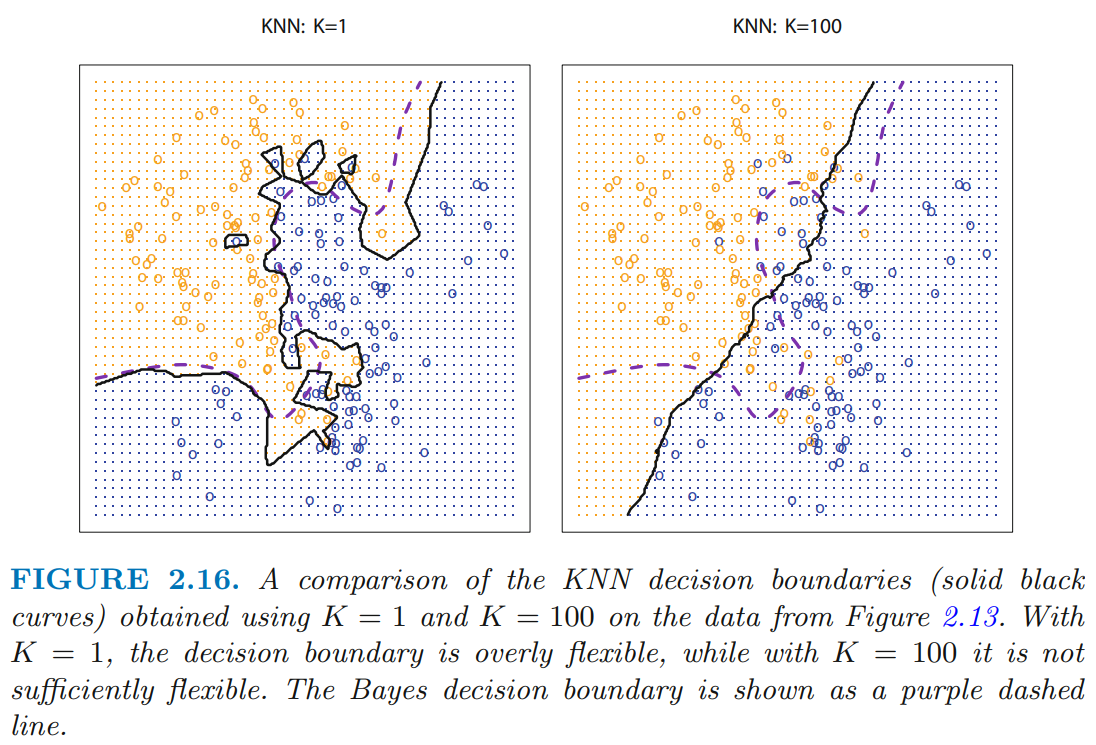
</div>
          

 &emsp; &emsp; &emsp; &emsp; &emsp;  <b>-----------------------------------------------------------------------------------------------------------------------------------------------------</b>

<font size=4pt; color='red'>***In R***</font>

In [6]:
# enables the %%R magic
%load_ext rpy2.ipython

## Using R in cell
# %%R -i df -w 5 -h 5 --units in -r 200
# %%R makes it a R cell
# -i df >> imports df from global environment
# -w 5 -h 5 --units in -r 200 >> make default figure size 5 by 5 inches with 200 dpi resolution

C:\Users\Rahul\anaconda3\lib\site-packages\rpy2\robjects\packages.py:366: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [7]:
%%R
df = data.frame(Obs = c(1,2,3,4,5,6),
               X1 = c(0,2,0,0,-1,1),
               X2 = c(3,0,1,1,0,1),
               X3 = c(0,0,3,2,1,1),
               Y = c(unlist(strsplit('Red Red Red Green Green Red',split=' '))))
df

  Obs X1 X2 X3     Y
1   1  0  3  0   Red
2   2  2  0  0   Red
3   3  0  1  3   Red
4   4  0  1  2 Green
5   5 -1  0  1 Green
6   6  1  1  1   Red


**(a) Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0**

In [8]:
%%R
# a) Euclidean distance with (0,0,0)
pt = c(0,0,0)
df$EucD = apply(cbind(df$X1, df$X2, df$X3), 1, function(x) round(sqrt(sum((x - pt)^2)),2))
df[order(df$EucD, decreasing=F), ]

  Obs X1 X2 X3     Y EucD
5   5 -1  0  1 Green 1.41
6   6  1  1  1   Red 1.73
2   2  2  0  0   Red 2.00
4   4  0  1  2 Green 2.24
1   1  0  3  0   Red 3.00
3   3  0  1  3   Red 3.16


**(b) What is our prediction with K = 1? Why?**  
Green &rarr; nearest point to the origin is the 5th observation, which is Green

In [9]:
%%R
df[which.min(df$EucD),]

  Obs X1 X2 X3     Y EucD
5   5 -1  0  1 Green 1.41


**(c) What is our prediction with K = 3? Why?**  
Red → Of the 3 nearest points to the origin, most are red

KNN classifier will classify $x_0$ to $Y_j$ class that has the highest conditional probability, which will be estimated by the class having the highest proportion. So, the class with highest freq will have the highest proportion and thus the highest conditional prob.

In [10]:
%%R
k = 3
# sorting df acc to Eucledian distance
ranked_df = df[order(df$EucD), ]

# smallest k distances
neighbors = ranked_df[1:k,]

# frequency table for Y
ft = data.frame(table(neighbors$Y))
print(ft)
cat('\n')

# most common class in nearest neighbours
ft[which.max(ft$Freq),]
# >>> Red

   Var1 Freq
1 Green    1
2   Red    2

  Var1 Freq
2  Red    2


[Go to Index](#Index)